## This scripts generates Figure 2, Supplemental Figure 2, and corresponding data.   

Author: Kexin Dong  
Date: Apr 9, 2024  

# 0. Import packages  

In [2]:
import h2m
import pandas as pd
from cyvcf2 import VCF
import numpy as np
import matplotlib.pyplot as plt
import re
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


# 1. Generate input data of H2M from downloaded raw data  

### (1) AACR-GENIE  
Downloaded from Synapse (https://www.synapse.org/#!Synapse:syn53210170)  

In [ ]:
path_aacr = '.../AACR-GENIE/v15.0/data_mutations_extended.txt'
df = h2m.cbio_reader(path_aacr, keep=True)
df  = pd.DataFrame(df[['gene_name_h','tx_id_h','start_h','end_h','ref_seq_h','alt_seq_h','type_h']].value_counts()).reset_index(drop=False)
# change 'TNP' to 'ONP'
dict_change = dict({'TNP':'ONP'})
df['type_h'] = df['type_h'].replace(dict_change)
# count frequencies
len(df) #851088

In [ ]:
df = h2m.query_batch(df)[0]
df

There were rows that could not be processed.


,gene_name_h,tx_id_h,start_h,end_h,ref_seq_h,alt_seq_h,type_h,count_aacr,gene_name_m
0,MGA,ENST00000219905.7,42040955,42040955,C,G,SNP,7,Mga
1,MGA,ENST00000219905.7,42040978,42040978,C,T,SNP,7,Mga
2,MGA,ENST00000219905.7,42034744,42034744,C,T,SNP,7,Mga
3,MGA,ENST00000219905.7,42042300,42042301,CT,-,DEL,7,Mga
4,MGA,ENST00000219905.7,42042185,42042185,C,G,SNP,7,Mga
...,...,...,...,...,...,...,...,...,...
840988,GSTP1,ENST00000398606.3,67352689,67352689,A,G,SNP,1,Gstp2
840989,GSTP1,ENST00000398606.3,67352748,67352748,G,C,SNP,1,Gstp1
840990,GSTP1,ENST00000398606.3,67352748,67352748,G,C,SNP,1,Gstp2
840991,GSTP1,ENST00000398606.3,67353970,67353970,T,C,SNP,1,Gstp1


In [ ]:
df = h2m.get_tx_batch(df, species='m')[0]
df

There were rows that could not be processed.


,gene_name_h,tx_id_h,start_h,end_h,ref_seq_h,alt_seq_h,type_h,count_aacr,gene_name_m,tx_id_m
0,MGA,ENST00000219905.7,42040955,42040955,C,G,SNP,7,Mga,ENSMUST00000110774.8
1,MGA,ENST00000219905.7,42040978,42040978,C,T,SNP,7,Mga,ENSMUST00000110774.8
2,MGA,ENST00000219905.7,42034744,42034744,C,T,SNP,7,Mga,ENSMUST00000110774.8
3,MGA,ENST00000219905.7,42042300,42042301,CT,-,DEL,7,Mga,ENSMUST00000110774.8
4,MGA,ENST00000219905.7,42042185,42042185,C,G,SNP,7,Mga,ENSMUST00000110774.8
...,...,...,...,...,...,...,...,...,...,...
840134,GSTP1,ENST00000398606.3,67352689,67352689,A,G,SNP,1,Gstp2,ENSMUST00000042700.12
840135,GSTP1,ENST00000398606.3,67352748,67352748,G,C,SNP,1,Gstp1,ENSMUST00000169613.4
840136,GSTP1,ENST00000398606.3,67352748,67352748,G,C,SNP,1,Gstp2,ENSMUST00000042700.12
840137,GSTP1,ENST00000398606.3,67353970,67353970,T,C,SNP,1,Gstp1,ENSMUST00000169613.4


In [ ]:
df['index'] = list(range(len(df)))
df = df.fillna('')
df.to_csv('.../Output/h2m/aacr_input.csv',index=False)

814382

### (2) COSMIC  
Downloaded from COSMIC website (https://cancer.sanger.ac.uk/cosmic/download/cosmic/v99/mutantcensus)  

In [ ]:
df = pd.read_csv('/Users/gorkordkx/Documents/Output/h2m/Cosmic_MutantCensus_Tsv_v99_GRCh37/Cosmic_MutantCensus_v99_GRCh37.tsv', sep='\t')
df = df.drop_duplicates()
df['GENOMIC_WT_ALLELE'] = df['GENOMIC_WT_ALLELE'].fillna('')
df['GENOMIC_MUT_ALLELE'] = df['GENOMIC_MUT_ALLELE'].fillna('')
df['type_h'] = [h2m.get_type(x,y) for x,y in zip(df['GENOMIC_WT_ALLELE'], df['GENOMIC_MUT_ALLELE'])]
df = df.dropna(subset = 'type_h')
df = df.reset_index(drop=True)
df = df[['GENE_SYMBOL','TRANSCRIPT_ACCESSION','GENOME_START','GENOME_STOP','GENOMIC_WT_ALLELE','GENOMIC_MUT_ALLELE','type_h','GENOMIC_MUTATION_ID']]
df.columns = ['gene_name_h','tx_id_h','start_h','end_h','ref_seq_h','alt_seq_h','type_h', 'GENOMIC_MUTATION_ID']
len(df)

1771601

In [ ]:
result = h2m.query_batch(df, direction = 'h2m')
df = result[0]
result = h2m.get_tx_batch(df, 'm')
df = result[0]
df.to_csv('.../Output/h2m/cosmic_input.csv', index=False)

### (3) ClinVar  
Downloaded from ClinVar FTP Site (https://ftp.ncbi.nlm.nih.gov/pub/clinvar/)  

Read from vcf file  

In [ ]:
gene = []
ref = []
alt = []
chrom = []
start = []
end = []
CLNHGVS = []
var_type = []
CLNDN = []
CLNSIG = []
allele_id = []

var_id = []

a = ['Deletion', 'Duplication', 'Indel', 'Insertion', 'Inversion',
    'Microsatellite', 'Variation', 'single_nucleotide_variant']
b = ['DEL', 'Duplication', 'INDEL', 'INS', 'Inversion',
    'Microsatellite', 'Variation', 'SNP']

var_dict = dict(zip(a,b))

In [ ]:
for variant in VCF('/Users/gorkordkx/Dropbox (MIT)/Kexin Dong’s files/h2m_data/ClinVar/GRCh37_clinvar_20240206.vcf.gz'): # or VCF('some.bcf')
    var_id.append(int(variant.ID))
    allele_id.append(variant.INFO.get('ALLELEID'))
    gene.append(variant.INFO.get('GENEINFO'))
    CLNSIG.append(variant.INFO.get('CLNSIG'))
    var_type.append(variant.INFO.get('CLNVC'))
    CLNHGVS.append(variant.INFO.get('CLNHGVS'))
    CLNDN.append(variant.INFO.get('CLNDN'))
    ref.append(variant.REF)
    chrom.append(variant.CHROM)
    start.append(variant.start)
    end.append(variant.end)

    if len(variant.ALT)==1:
        alt.append(variant.ALT[0])
    elif len(variant.ALT)>1:
        tot = len(variant.ALT)-1
        alt.append(variant.ALT[0])
        for i in range(tot):
            var_id.append(int(variant.ID))
            allele_id.append(variant.INFO.get('ALLELEID'))
            gene.append(variant.INFO.get('GENEINFO'))
            CLNSIG.append(variant.INFO.get('CLNSIG'))
            var_type.append(variant.INFO.get('CLNVC'))
            CLNHGVS.append(variant.INFO.get('CLNHGVS'))
            CLNDN.append(variant.INFO.get('CLNDN'))
            ref.append(variant.REF)
            chrom.append(variant.CHROM)
            start.append(variant.start)
            end.append(variant.end)
            alt.append(variant.ALT[i+1])
    else:
        alt.append('')

[W::vcf_parse] Contig '1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '2' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '3' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '4' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '5' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '6' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '7' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '8' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '9' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig '10' is not defined in the header. (Quick workaroun

In [ ]:
var_type = [var_dict[i] for i in var_type]
def change_to_gene(x):
    if x is None:
        return x
    else:
        return x.split(':')[0]
gene = [change_to_gene(x) for x in gene] #extracting just gene information...
start = np.asarray(start)+1

d1 = ['Hugo_Symbol', 'Chromosome', 'Start_Position', 'End_Position', 'Reference_Allele', 
    'Tumor_Seq_Allele2', 'Variant_Type', 'Variation_ID','Allele_ID','CLNSIG', 'CLNHGVS', 'CLNDN']

combined = [gene, chrom, start, end, ref, alt, var_type, var_id, allele_id,
        CLNSIG, CLNHGVS, CLNDN]

d = dict(zip(d1, combined))
clinvar = pd.DataFrame(data = d)
clinvar = clinvar.drop_duplicates().dropna().reset_index(drop=True)
clinvar.to_csv('/Users/gorkordkx/Desktop/Flab - Drylab/Database/ClinVar/GRCh37_clinvar_20240206.csv',index=False)

In [ ]:
# change the postision annotation to the h2m style
df_not_ins = clinvar[clinvar['Variant_Type']!='INS'].reset_index(drop=True)
df_ins = clinvar[clinvar['Variant_Type']=='INS'].reset_index(drop=True)

In [ ]:
df_ins['End_Position'] = [x+1 for x in df_ins['End_Position']]
df_ins['Reference_Allele'] = ''
df_ins['Tumor_Seq_Allele2'] = [x[1:] for x in df_ins['Tumor_Seq_Allele2']]
df_ins

,Hugo_Symbol,Chromosome,Start_Position,End_Position,Reference_Allele,Tumor_Seq_Allele2,Variant_Type,Variation_ID,Allele_ID,CLNSIG,CLNHGVS,CLNDN
0,SAMD11,1,874778,874779,,CCTCCCCAGCCACGGTGAGGACCCACCCTGGCATGATCTCCCCTCATCA,INS,2417769,1937842,Uncertain_significance,NC_000001.10:g.874816_874817insTCCCCTCATCACCTC...,not_provided
1,SAMD11,1,874778,874779,,CCTCCCCAGCCACGGTGAGGACCTACCCTGGCATGATCCCCCTCATCA,INS,1479161,1426532,Uncertain_significance,NC_000001.10:g.874801_874802insTACCCTGGCATGATC...,not_provided
2,SAMD11,1,874816,874817,,T,INS,1404104,1479803,Uncertain_significance,NC_000001.10:g.874816_874817insT,not_provided
3,SAMD11,1,876682,876683,,T,INS,2127271,2174809,Uncertain_significance,NC_000001.10:g.876682_876683insT,not_provided
4,ISG15,1,949839,949840,,GCCCGT,INS,1038082,1022454,Uncertain_significance,NC_000001.10:g.949842_949843insCGTGCC,Mendelian_susceptibility_to_mycobacterial_dise...
...,...,...,...,...,...,...,...,...,...,...,...,...
9806,MT-CO3,MT,9273,9274,,ATC,INS,599028,590157,Pathogenic,NC_012920.1:m.9273_9274insATC,Tetralogy_of_Fallot
9807,MT-CO3,MT,9311,9312,,GCA,INS,590894,581839,Likely_pathogenic,NC_012920.1:m.9311_9312insGCA,Abnormal_aortic_valve_physiology
9808,MT-CO3,MT,9429,9430,,CCC,INS,599026,590155,Pathogenic,NC_012920.1:m.9429_9430insCCC,Tetralogy_of_Fallot
9809,MT-CO3,MT,9431,9432,,A,INS,590891,581836,Pathogenic,NC_012920.1:m.9431_9432insA,Abnormal_aortic_valve_physiology


In [ ]:
clinvar = pd.concat([df_ins, df_not_ins], ignore_index=True)
clinvar

,Hugo_Symbol,Chromosome,Start_Position,End_Position,Reference_Allele,Tumor_Seq_Allele2,Variant_Type,Variation_ID,Allele_ID,CLNSIG,CLNHGVS,CLNDN
0,SAMD11,1,874778,874779,,CCTCCCCAGCCACGGTGAGGACCCACCCTGGCATGATCTCCCCTCATCA,INS,2417769,1937842,Uncertain_significance,NC_000001.10:g.874816_874817insTCCCCTCATCACCTC...,not_provided
1,SAMD11,1,874778,874779,,CCTCCCCAGCCACGGTGAGGACCTACCCTGGCATGATCCCCCTCATCA,INS,1479161,1426532,Uncertain_significance,NC_000001.10:g.874801_874802insTACCCTGGCATGATC...,not_provided
2,SAMD11,1,874816,874817,,T,INS,1404104,1479803,Uncertain_significance,NC_000001.10:g.874816_874817insT,not_provided
3,SAMD11,1,876682,876683,,T,INS,2127271,2174809,Uncertain_significance,NC_000001.10:g.876682_876683insT,not_provided
4,ISG15,1,949839,949840,,GCCCGT,INS,1038082,1022454,Uncertain_significance,NC_000001.10:g.949842_949843insCGTGCC,Mendelian_susceptibility_to_mycobacterial_dise...
...,...,...,...,...,...,...,...,...,...,...,...,...
2352593,MT-TP,MT,16015,16015,T,TATTCTCTGTTCTTTC,Duplication,690276,677667,Uncertain_significance,NC_012920.1:m.16018_16032dup,"Juvenile_myopathy,_encephalopathy,_lactic_acid..."
2352594,MT-TP,MT,16017,16017,T,C,SNP,690275,677668,Benign,NC_012920.1:m.16017T>C,"Juvenile_myopathy,_encephalopathy,_lactic_acid..."
2352595,MT-TP,MT,16021,16021,C,T,SNP,690277,677669,Uncertain_significance,NC_012920.1:m.16021C>T,"Juvenile_myopathy,_encephalopathy,_lactic_acid..."
2352596,MT-TP,MT,16023,16023,G,A,SNP,1684921,1676946,Uncertain_significance,NC_012920.1:m.16023G>A,not_specified


In [ ]:
clinvar = clinvar.rename(columns = {
    'Hugo_Symbol':'gene_name_h',
    'Start_Position':'start_h',
    'End_Position':'end_h',
    'Reference_Allele':'ref_seq_h',
    'Tumor_Seq_Allele2':'alt_seq_h',
    'Variant_Type':'type_h'
})

In [ ]:
del df_ins, df_not_ins

In [ ]:
result = h2m.get_tx_batch(clinvar, 'h',ver = 37)
len(result[1])

There were rows that could not be processed.


69654

In [ ]:
result = h2m.query_batch(result[0], direction = 'h2m')
len(result[1])

There were rows that could not be processed.


57799

In [ ]:
result = h2m.get_tx_batch(result[0], 'm')
len(result[1])

There were rows that could not be processed.


31296

In [ ]:
clinvar = result[0]
clinvar = h2m.get_variant_type(clinvar, 'ref_seq_h', 'alt_seq_h', 'type_h')
clinvar.to_csv('/Users/gorkordkx/Documents/Output/h2m/clinvar_input.csv', index=False)

### (4) Statistics   

In [65]:
df_aacr = pd.read_csv('/Users/gorkordkx/Desktop/h2m-manuscript-data/1_murine_mutation_database/2_input_data_processed/aacr_input.csv')
df_cosmic = pd.read_csv('/Users/gorkordkx/Desktop/h2m-manuscript-data/1_murine_mutation_database/2_input_data_processed/cosmic_input.csv')
df_clinvar = pd.read_csv('/Users/gorkordkx/Desktop/h2m-manuscript-data/1_murine_mutation_database/2_input_data_processed/clinvar_input.csv')

In [66]:
[x['type_h'].value_counts() for x in [df_aacr, df_cosmic, df_clinvar]]

[SNP    725610
 DEL     68346
 INS     28165
 DNP     15012
 ONP      3006
 Name: type_h, dtype: int64,
 SNP    1014487
 DEL      53979
 INS      36022
 DNP       4811
 ONP        400
 Name: type_h, dtype: int64,
 SNP    2099697
 DEL     124987
 INS      63804
 DNP       6687
 ONP        994
 Name: type_h, dtype: int64]

In [67]:
name_list = ['aacr','cosmic','clinvar']
df_list = [df_aacr, df_cosmic, df_clinvar]

for x in [0,1,2]:
    l = len(df_list[x].drop_duplicates(subset = list(df_list[x].columns)[:-2]))
    print(f'{name_list[x]}: {l} mutations with homologous gene in mouse in total. \n')

for x in [0,1,2]:
    l = len(df_list[x]['index'].unique())
    print(f'{name_list[x]}: {l} homologous murine muts awaiting for prediction in mouse in total. \n')

aacr: 840139 mutations with homologous gene in mouse in total. 

cosmic: 1109699 mutations with homologous gene in mouse in total. 

clinvar: 2296170 mutations with homologous gene in mouse in total. 

aacr: 840139 homologous murine muts awaiting for prediction in mouse in total. 

cosmic: 1109699 homologous murine muts awaiting for prediction in mouse in total. 

clinvar: 2296170 homologous murine muts awaiting for prediction in mouse in total. 



### (5) Input overlap  

In [68]:
list_of_2_overlap = []
for x,y in zip([0,0,1],[1,2,2]):
    df_1 = [df_aacr, df_cosmic, df_clinvar][x]
    df_2 = [df_aacr, df_cosmic, df_clinvar][y]
    df_all = pd.merge(df_1, df_2, on = ['gene_name_h',
 'start_h',
 'end_h',
 'ref_seq_h',
 'alt_seq_h',
 'type_h'], how = 'inner')
    df_all = df_all[['gene_name_h',
 'start_h',
 'end_h',
 'ref_seq_h',
 'alt_seq_h',
 'type_h']]
    df_all = df_all.drop_duplicates().reset_index(drop=True)
    list_of_2_overlap.append(df_all)
    name_1, name_2 = name_list[x], name_list[y]
    l = len(df_all)
    print(f'{name_1} | {name_2}: {l} overlapped mutations in total.')

aacr | cosmic: 126302 overlapped mutations in total.
aacr | clinvar: 118252 overlapped mutations in total.
cosmic | clinvar: 61114 overlapped mutations in total.


In [71]:
[x-32881 for x in [126302, 118252, 61114]]

[93421, 85371, 28233]

In [69]:
df_1 = list_of_2_overlap[0]
df_2 = list_of_2_overlap[1]
df_all = pd.merge(df_1, df_2, on = ['gene_name_h',
'start_h',
'end_h',
'ref_seq_h',
'alt_seq_h',
'type_h'], how = 'inner')
df_all = df_all[['gene_name_h',
'start_h',
'end_h',
'ref_seq_h',
'alt_seq_h',
'type_h']]
df_all = df_all.drop_duplicates().reset_index(drop=True)
list_of_2_overlap.append(df_all)
# name_1, name_2 = ['1','2','3'][x], ['1','2','3'][y]
l = len(df_all)
print(f'{name_1} | {name_2}: {l} overlapped mutations in total.')

cosmic | clinvar: 32881 overlapped mutations in total.


In [72]:
840139 - 93421-85371+32881

694228

In [73]:
1109699 - 93421-28233+32881

1020926

In [74]:
2296170 - 28173 - 85371+32881

2215507

In [ ]:
# df_all = pd.merge(df, df_run, on = ['gene_name_h',
#  'start_h',
#  'end_h',
#  'ref_seq_h',
#  'alt_seq_h',
#  'type_h'], how = 'inner')

In [79]:
np.array([694228, 1020926, 93421, 2215507, 85371,28333,32881]).sum()

4170667

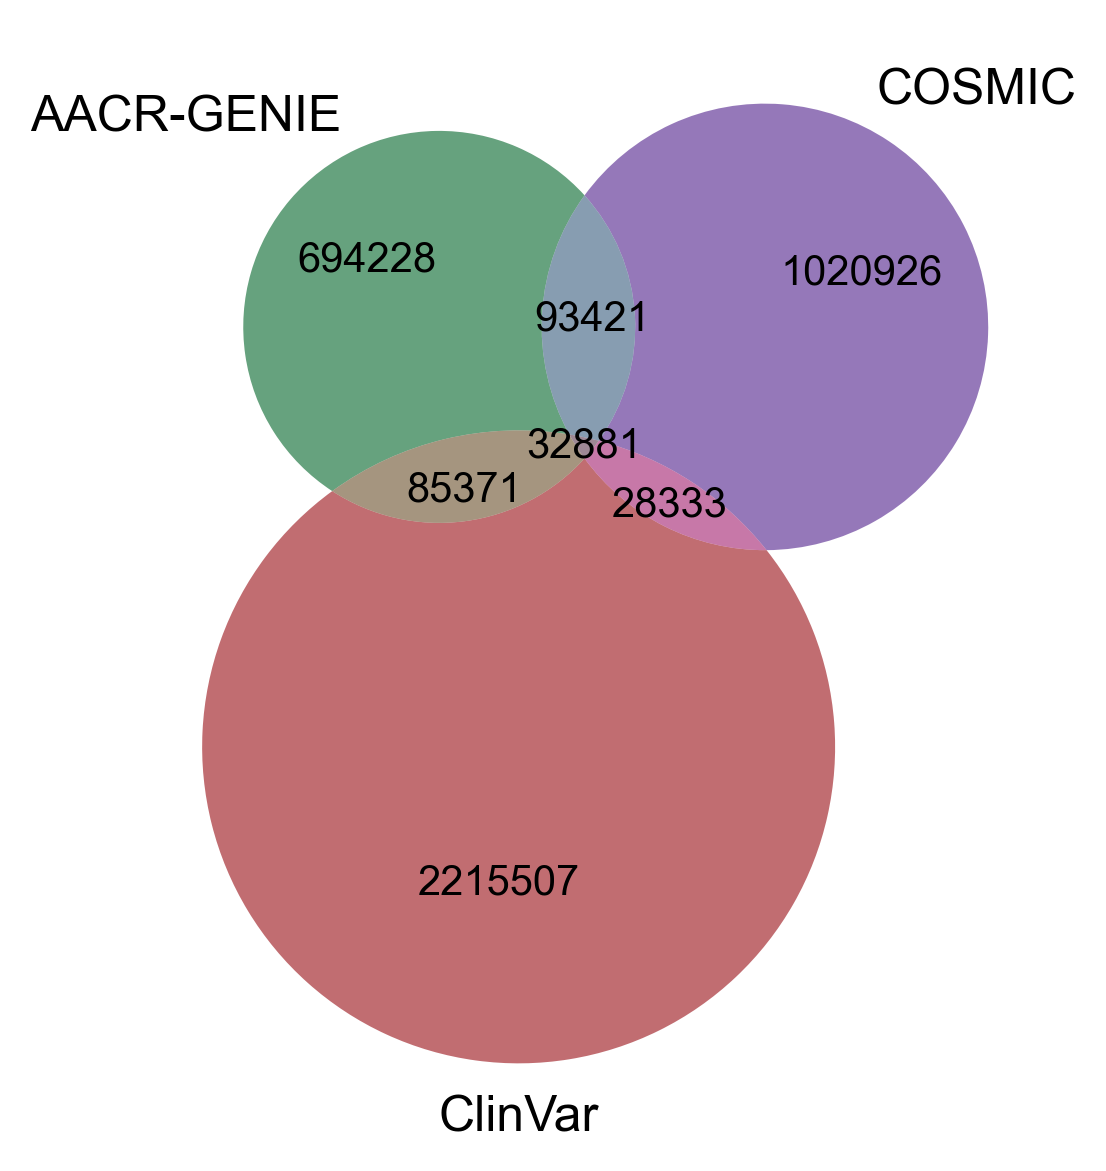

In [80]:
from matplotlib_venn import venn3
fig, ax = plt.subplots(dpi=300)
venn3(subsets = (694228, 1020926, 93421, 2215507, 85371,28333,32881) , set_labels=('AACR-GENIE', 'COSMIC','ClinVar'), set_colors=(plt.cm.Greens(0.9), plt.cm.Purples(.9), plt.cm.Reds(.9)), alpha = 0.6)

plt.savefig('/Users/gorkordkx/Documents/Output/h2m/venn_3.svg', bbox_inches='tight')
plt.show()

In [ ]:
df_all['gene_name_h'].value_counts()

ATM       1067
TP53      1030
APC        997
NF1        977
BRCA2      757
          ... 
PSIP1        1
MUC1         1
KNSTRN       1
NFKBIE       1
ATF1         1
Name: gene_name_h, Length: 466, dtype: int64

In [ ]:
df_all.to_csv('.../Output/h2m/overlap_input.csv', index=False)

In [ ]:
df_all

,gene_name_h,start_h,end_h,ref_seq_h,alt_seq_h,type_h
0,CDK4,58145099,58145099,C,T,SNP
1,CDK4,58142322,58142322,C,T,SNP
2,CDK4,58145437,58145437,T,G,SNP
3,CDK4,58143020,58143020,C,T,SNP
4,CDK4,58143065,58143065,C,T,SNP
...,...,...,...,...,...,...
32876,KIAA1549,138602177,138602177,G,A,SNP
32877,KIAA1549,138552845,138552845,C,T,SNP
32878,KIAA1549,138602291,138602291,G,A,SNP
32879,KIAA1549,138602901,138602901,C,T,SNP


In [ ]:
df = pd.DataFrame(df_all['gene_name_h'].value_counts()).reset_index(drop=False)
names = df['index'][:10][::-1]
counts = df['gene_name_h'][:10][::-1]
y = [i * 0.9 for i in range(len(names))]
from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke

In [ ]:
# The colors
BLUE = "#076fa2"

fig, ax = plt.subplots(figsize=(9, 6), dpi = 300)
ax.barh(y, counts, height=0.55, align="edge", color=BLUE);
ax.xaxis.set_ticks([i * 200 for i in range(0, 6)])
ax.xaxis.set_ticklabels([i * 200 for i in range(0, 6)], size=18, fontfamily="Arial", fontweight=100)
ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)

ax.set_ylim((0, len(names) * 0.9 - 0.2))

ax.set_axisbelow(True)
ax.grid(axis = "x", color="#A8BAC4", lw=1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_lw(1.5)
ax.spines["left"].set_capstyle("butt")
PAD = 0.3
x = 0
color = "white"
path_effects = None
for name, count, y_pos in zip(names, counts, y):
    ax.text(
            x + PAD, y_pos + 0.5 / 2, name, 
            color=color, fontsize=18, va="center",
            path_effects=path_effects
        ) 
ax.yaxis.set_visible(False)

plt.savefig('.../Output/h2m/overlap_counts.svg', bbox_inches='tight')
plt.show()

# 2. Run H2M  
See ./2_run_h2m_murine_mutation_database.  

# 3. Result Statistics  

### (1) Model-able Statistics  

In [83]:
df_aacr = pd.read_csv('/Users/gorkordkx/Documents/Output/h2m/1_murine_mutation_database_output/aacr_output/aacr_result_f0.csv')
df_cosmic = pd.read_csv('/Users/gorkordkx/Documents/Output/h2m/1_murine_mutation_database_output/cosmic_output/cosmic_result_f0.csv')
df_clinvar = pd.read_csv('/Users/gorkordkx/Documents/Output/h2m/1_murine_mutation_database_output/clinvar_output/clinvar_result_f0.csv')

In [84]:
name_list = ['aacr','cosmic','clinvar']
df_list = [df_aacr, df_cosmic, df_clinvar]

for x in [0,1,2]:
    l_1 = len(df_list[x]['index'].unique())
    df_sub = df_list[x][df_list[x]['status']==True]
    l_2 = len(df_sub['index'].unique())
    print(f'{name_list[x]}: {l_2} out of {l_1} ({l_2/l_1* 100:.2f}%) mutations can be modeled.\n')

aacr: 683645 out of 799660 (85.49%) mutations can be modeled.

cosmic: 473858 out of 598809 (79.13%) mutations can be modeled.

clinvar: 1585810 out of 2021074 (78.46%) mutations can be modeled.



In [125]:
799660+598809+2021074

0.8340348780487805

In [86]:
683645+473858+1585810

2743313

In [12]:
df_aacr['statement'].value_counts()

Class 0: This mutation can be originally modeled.                                   566996
Class 4: Flanked segments are not identical.                                        117841
Class 2: This mutation can be modeled, but the effect may not be consistent.         97055
Class 1: This mutation can be alternatively modeled.                                 93736
Class 3: This mutation cannot be originally modeled and no alternative is found.       745
Class 5: Coordinate error. This mutation is not in the query gene.                       2
Name: statement, dtype: int64

In [ ]:
df_aacr = pd.read_csv('.../aacr_output/aacr_result_f0.csv')
df_cosmic = pd.read_csv('.../cosmic_output/cosmic_result_f0.csv')
df_clinvar = pd.read_csv('.../clinvar_output/clinvar_result_f0.csv')

In [117]:
list_of_n = []
list_of_fs = []
list_of_input = []
list_of_output = []
list_of_class_0 = []
list_of_class_1 = []
list_of_class_2 = []
list_of_class_3 = []

for x in [0,1,2]:
    name = name_list[x]
    for fs in [0,2,5,10]:
        df = pd.read_csv(f'/Users/gorkordkx/Documents/Output/h2m/1_murine_mutation_database_output/{name}_output/{name}_result_f{fs}.csv')
        list_of_n.append(name)
        list_of_fs.append(fs)
        l_1 = len(df['index'].unique())
        df_sub = df[df['status']==True]
        l_2 = len(df_sub['index'].unique())
        print(f'{name} with {fs}: {l_2} out of {l_1} ({l_2/l_1* 100:.2f}%) mutations can be modeled.\n')
        list_of_output.append(l_2)
        list_of_input.append(l_1)
        list_of_class_0.append(len(df[df['class']==0]['index'].unique()))
        list_of_class_1.append(len(df[df['class']==1]['index'].unique()))
        list_of_class_2.append(len(df[df['class']==2]['index'].unique()))
        list_of_class_3.append(len(df[df['class']==3]['index'].unique()))

aacr with 0: 683645 out of 799660 (85.49%) mutations can be modeled.

aacr with 2: 495966 out of 799668 (62.02%) mutations can be modeled.

aacr with 5: 378042 out of 799745 (47.27%) mutations can be modeled.

aacr with 10: 282303 out of 799748 (35.30%) mutations can be modeled.

cosmic with 0: 473858 out of 598809 (79.13%) mutations can be modeled.

cosmic with 2: 297198 out of 598813 (49.63%) mutations can be modeled.

cosmic with 5: 216201 out of 598814 (36.10%) mutations can be modeled.

cosmic with 10: 161084 out of 598814 (26.90%) mutations can be modeled.

clinvar with 0: 1585810 out of 2021074 (78.46%) mutations can be modeled.

clinvar with 2: 1000197 out of 2021087 (49.49%) mutations can be modeled.

clinvar with 5: 679938 out of 2021090 (33.64%) mutations can be modeled.

clinvar with 10: 453878 out of 2021091 (22.46%) mutations can be modeled.



In [118]:
df = pd.DataFrame(zip(list_of_n, list_of_fs,
list_of_input,
list_of_output,
list_of_class_0,
list_of_class_1,
list_of_class_2,
list_of_class_3))
df.columns = ['Database','Flank_Size','Num_Input','Num_Output','Class_0','Class_1','Class_2','Class_3']

In [119]:
df

,Database,Flank_Size,Num_Input,Num_Output,Class_0,Class_1,Class_2,Class_3
0,aacr,0,799660,683645,553538,35533,94574,731
1,aacr,2,799668,495966,412789,23429,59748,440
2,aacr,5,799745,378042,320070,17817,40155,330
3,aacr,10,799748,282303,241830,13042,27431,237
4,cosmic,0,598809,473858,320006,20918,132934,775
5,cosmic,2,598813,297198,242876,14167,40155,459
6,cosmic,5,598814,216201,191770,10986,13445,354
7,cosmic,10,598814,161084,147566,8237,5281,257
8,clinvar,0,2021074,1585810,1236679,79882,269249,4135
9,clinvar,2,2021087,1000197,837457,47670,115070,2194


In [95]:
df_stat = pd.read_csv('/Users/gorkordkx/Desktop/h2m-manuscript-data/1_murine_mutation_database/statistics.csv')

#### Bar plots & Pie plots

In [126]:
df_stat

,Database,Total_Input,Input_Human_Mutations_With_Murine_Homo,Pre_predicted,Modeled_0
0,AACR-GENIE,851088,840139,799660,683645
1,COSMIC,1112815,1109699,598809,473858
2,ClinVar,2352598,2296170,2021074,1585810


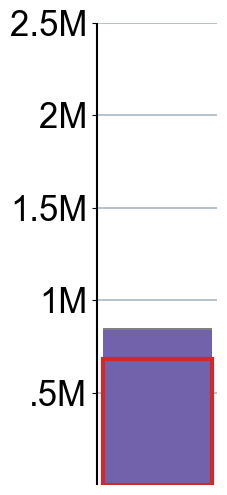

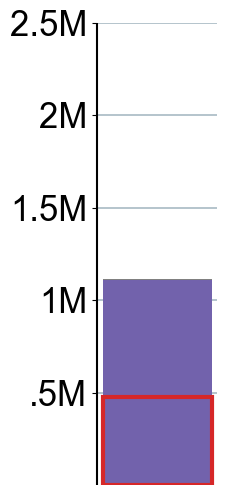

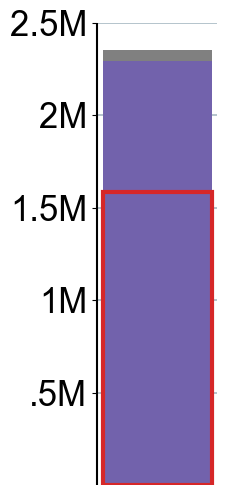

In [129]:
def drawBar(x1, y1, bottom, color):
    plt.bar(x1, y1, bottom=bottom, color=color, width = 0.2)
name = ['aacr','cosmic','clinvar']
for i,x in df_stat.iterrows():
    a,b,c,d = x[1:5]
    fig, ax = plt.subplots(figsize=(1.55,6))
    drawBar(0.3, b, 0, color = plt.cm.Purples(0.7))
    drawBar(0.3, a-b, b, color = 'grey')
    plt.bar(0.3, d, color=plt.cm.Purples(0.7), width = 0.2, edgecolor = 'tab:red', linewidth=3)
    ax.set_ylim((0, 1))
    ax.yaxis.set_ticks([x*10000 for x in [50,100,150,200,250]])
    ax.yaxis.set_ticklabels(['.5M', '1M', '1.5M', '2M', '2.5M'], size=25, fontfamily="Arial", fontweight=100)
    # ax.yaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
    ax.set_axisbelow(True)
    ax.grid(axis = "y", color="#A8BAC4", lw=1.2)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_lw(1.5)
    ax.spines["left"].set_capstyle("butt")
    ax.xaxis.set_visible(False)
    plt.xticks([])
    plt.yticks(fontsize = 25)
    plt.savefig(f'/Users/gorkordkx/Documents/Output/h2m/bar_{name[i]}.svg', bbox_inches='tight')
    plt.show()

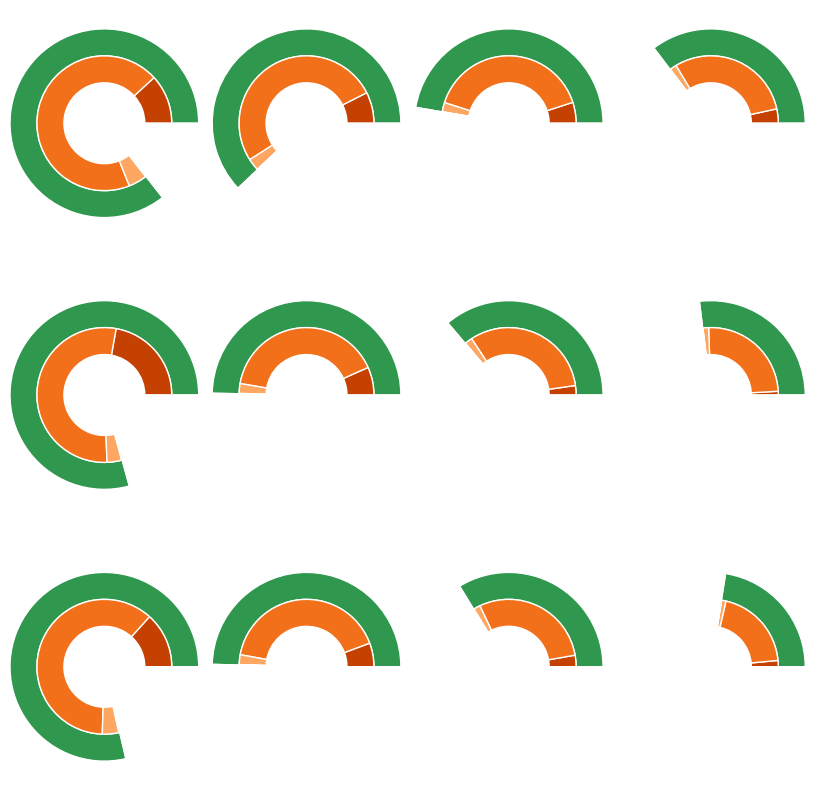

In [142]:
fig, ax = plt.subplots(figsize=(10,10), nrows = 3, ncols = 4)
for i, x in df.iterrows():
    name = x[0]
    ax_x = i//4
    ax_y = i%4
    fs, input, output, n_0,n_1,n_2,n_3 = [int(t) for t in x[1:-2]]
    ax[ax_x][ax_y].axis('equal')
    mypie2, _ = ax[ax_x][ax_y].pie([output+n_3, input-output-n_3], radius=1.4, colors=[plt.cm.Greens(0.7),'white'], startangle=0)
    plt.setp(mypie2, width=0.4, edgecolor='white')

    mypie3, _ = ax[ax_x][ax_y].pie([n_2,n_0,n_1,n_3,input-(n_0+n_1+n_2+n_3)], radius=1, colors=[plt.cm.Oranges(0.8), plt.cm.Oranges(0.6),plt.cm.Oranges(0.4),'grey','white'], startangle=0)
    plt.setp(mypie3, width=0.4, edgecolor='white')
    ax[ax_x][ax_y].margins(0,0)

plt.savefig(f'/Users/gorkordkx/Documents/Output/h2m/pie_plot.svg', bbox_inches='tight')
plt.show()

In [131]:
df['percet_modelable'] = df['Num_Output']/df['Num_Input']
df['percet_non_extension'] = df['Class_3']/df['Num_Input']
df.to_csv('/Users/gorkordkx/Documents/Output/h2m/sta_2.csv', index = False)
df

### (2) Statistics stratified by mutation types and classifications, taking flank_size = 2 as example  

- coding region or not  

In [143]:
fs = 2
name_list = ['aacr','cosmic','clinvar']
list_of_n = []
list_of_fs = []
list_of_input = []
list_of_output = []
list_of_class_0 = []
list_of_class_1 = []
list_of_class_2 = []
list_of_class_3 = []
list_of_region = []
for x in [0,1,2]:
    name = name_list[x]
    df = pd.read_csv(f'/Users/gorkordkx/Documents/Output/h2m/1_murine_mutation_database_output/{name}_output/{name}_result_f{fs}.csv')
    for i,exon_list in enumerate([['E'],['I','n']]):
        list_of_region.append(['coding','non-coding'][i])
        list_of_n.append(name)
        list_of_fs.append(fs)
        df_sub = df[[str(x)[0] in exon_list for x in df['exon_h']]].reset_index(drop=True)
        l_1 = len(df_sub['index'].unique())
        df_sub_2 = df_sub[df_sub['status']==True]
        l_2 = len(df_sub_2['index'].unique())
        print(f'{name} in {list_of_region[i]}: {l_2} out of {l_1} ({l_2/l_1* 100:.2f}%) mutations can be modeled.\n')
        list_of_output.append(l_2)
        list_of_input.append(l_1)
        list_of_class_0.append(len(df_sub[df_sub['class']==0]['index'].unique()))
        list_of_class_1.append(len(df_sub[df_sub['class']==1]['index'].unique()))
        list_of_class_2.append(len(df_sub[df_sub['class']==2]['index'].unique()))
        list_of_class_3.append(len(df_sub[df_sub['class']==3]['index'].unique()))

In [161]:
df = pd.DataFrame(zip(list_of_n, list_of_fs,list_of_region,
list_of_input,
list_of_output,
list_of_class_0,
list_of_class_1,
list_of_class_2,
list_of_class_3))
df.columns = ['Database','Flank_Size','Region','Num_Input','Num_Output','Class_0','Class_1','Class_2','Class_3']
df

,Database,Flank_Size,Region,Num_Input,Num_Output,Class_0,Class_1,Class_2,Class_3
0,aacr,2,coding,742931,478454,412111,23429,42914,440
1,aacr,2,non-coding,56737,17512,678,0,16834,0
2,cosmic,2,coding,388436,257413,242658,14167,588,459
3,cosmic,2,non-coding,210377,39785,218,0,39567,0
4,clinvar,2,coding,1671218,931832,836504,47670,47658,2194
5,clinvar,2,non-coding,349869,68365,953,0,67412,0


In [166]:
# move stop-codon mutations to coding classification
list_y = [678,-678,218,-218,953,-953]

df['Num_Input'] = [x+y for x,y in zip(df['Num_Input'],list_y)]
df['Num_Output'] = [x+y for x,y in zip(df['Num_Output'],list_y)]
df['Class_0'] = [x+y for x,y in zip(df['Class_0'],list_y)]
df

,Database,Flank_Size,Region,Num_Input,Num_Output,Class_0,Class_1,Class_2,Class_3
0,aacr,2,coding,743609,479132,412789,23429,42914,440
1,aacr,2,non-coding,56059,16834,0,0,16834,0
2,cosmic,2,coding,388654,257631,242876,14167,588,459
3,cosmic,2,non-coding,210159,39567,0,0,39567,0
4,clinvar,2,coding,1672171,932785,837457,47670,47658,2194
5,clinvar,2,non-coding,348916,67412,0,0,67412,0


In [167]:
df['percet_modelable'] = df['Num_Output']/df['Num_Input']
df.to_csv('/Users/gorkordkx/Documents/Output/h2m/sta_3.csv', index = False)
df

,Database,Flank_Size,Region,Num_Input,Num_Output,Class_0,Class_1,Class_2,Class_3,percet_modelable
0,aacr,2,coding,743609,479132,412789,23429,42914,440,0.644333
1,aacr,2,non-coding,56059,16834,0,0,16834,0,0.300291
2,cosmic,2,coding,388654,257631,242876,14167,588,459,0.662880
3,cosmic,2,non-coding,210159,39567,0,0,39567,0,0.188272
4,clinvar,2,coding,1672171,932785,837457,47670,47658,2194,0.557829
5,clinvar,2,non-coding,348916,67412,0,0,67412,0,0.193204


bar plot  

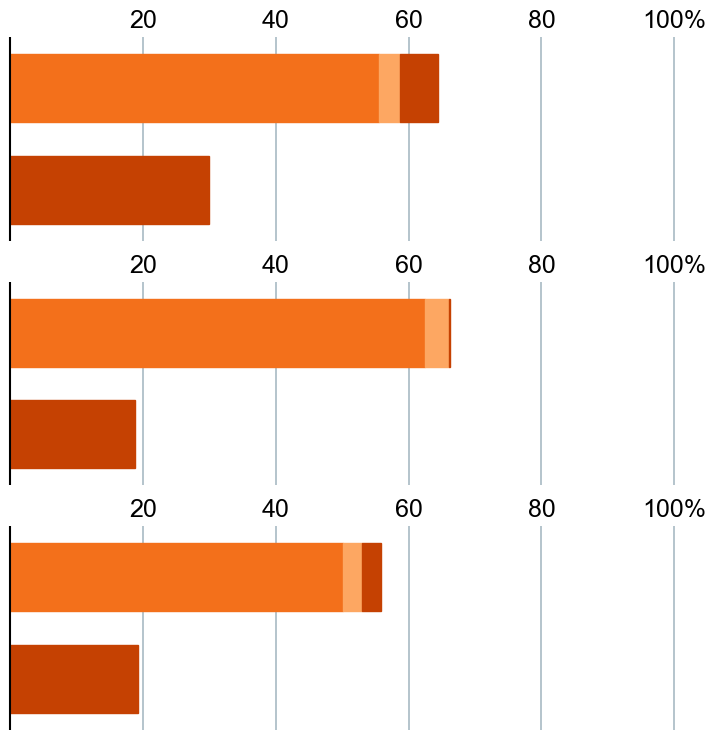

In [182]:
fig, ax = plt.subplots(nrows = 3, ncols = 1,figsize=(9, 9), sharex=True)
for t in [0,1,2]:
    name = name_list[t]
    x,y = df.iloc[2*t,3:9],df.iloc[2*t+1,3:9]
    x = x/x[0]
    y = y/y[0]
    bars = ax[t].barh([0.6, 0.3], [1,1], height = 0.2, color = 'white',alpha=0,edgecolor = 'black')
    for bar in bars:
        bar.set_linestyle('--')
        bar.set_linewidth(1)
    ax[t].barh([0.6, 0.3], [x[2],y[2]], height = 0.2, color = plt.cm.Oranges(0.6) , edgecolor = plt.cm.Oranges(0.6))
    ax[t].barh([0.6, 0.3], [x[3],y[3]], left = [x[2],y[2]], height = 0.2, color = plt.cm.Oranges(0.4), edgecolor = plt.cm.Oranges(0.4))
    ax[t].barh([0.6, 0.3], [x[4],y[4]], left = [x[2]+x[3],y[2]+y[3]], height = 0.2, color = plt.cm.Oranges(0.8), edgecolor = plt.cm.Oranges(0.8))
    ax[t].xaxis.set_ticks([.2,.4,.6,.8,1])
    ax[t].xaxis.set_ticklabels(['20','40','60','80','100%'], size=18, fontfamily="Arial", fontweight=100)
    ax[t].xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
    ax[t].set_ylim((.15, .75))
    ax[t].set_axisbelow(True)
    ax[t].grid(axis = "x", color="#A8BAC4", lw=1.2)
    ax[t].spines["right"].set_visible(False)
    ax[t].spines["top"].set_visible(False)
    ax[t].spines["bottom"].set_visible(False)
    ax[t].spines["left"].set_lw(1.5)
    ax[t].spines["left"].set_capstyle("butt")
    ax[t].yaxis.set_visible(False)

plt.savefig(f'/Users/gorkordkx/Documents/Output/h2m/bar_coding_fs_2.svg', bbox_inches='tight')
plt.show()

- detailed loci (exonic/splice site/deep intronic)

In [26]:
fs = 2
name_list = ['aacr','cosmic','clinvar']
list_of_n = []
list_of_fs = []
list_of_input = []
list_of_output = []
list_of_class_0 = []
list_of_class_1 = []
list_of_class_2 = []
list_of_class_3 = []
list_of_region = []
for x in [0,1,2]:
    name = name_list[x]
    df = pd.read_csv(f'/Users/gorkordkx/Documents/Output/h2m/1_murine_mutation_database_output/{name}_output/{name}_result_f{fs}.csv')
    # SNV-only
    df = df[df['type_h']=='SNP'].reset_index(drop=True)
    # exonic muts
    df_sub = df[[('E' in str(x)) for x in df['exon_h']]].reset_index(drop=True)
    list_of_region.append('Exonic')
    list_of_n.append(name)
    list_of_fs.append(fs)
    l_1 = len(df_sub['index'].unique())
    df_sub_2 = df_sub[df_sub['status']==True]
    l_2 = len(df_sub_2['index'].unique())
    print(f'{name} in Exonic Region: {l_2} out of {l_1} ({l_2/l_1* 100:.2f}%) mutations can be modeled.\n')
    list_of_output.append(l_2)
    list_of_input.append(l_1)
    list_of_class_0.append(len(df_sub[df_sub['class']==0]['index'].unique()))
    list_of_class_1.append(len(df_sub[df_sub['class']==1]['index'].unique()))
    list_of_class_2.append(len(df_sub[df_sub['class']==2]['index'].unique()))
    list_of_class_3.append(len(df_sub[df_sub['class']==3]['index'].unique()))

    # splicing muts
    df_sub= df[[('splice' in str(x)) for x in df['HGVSp_h']]].reset_index(drop=True)
    list_of_region.append('Splice_Site')
    list_of_n.append(name)
    list_of_fs.append(fs)
    l_1 = len(df_sub['index'].unique())
    df_sub_2 = df_sub[df_sub['status']==True]
    l_2 = len(df_sub_2['index'].unique())
    print(f'{name} in Splice Site: {l_2} out of {l_1} ({l_2/l_1* 100:.2f}%) mutations can be modeled.\n')
    list_of_output.append(l_2)
    list_of_input.append(l_1)
    list_of_class_0.append(len(df_sub[df_sub['class']==0]['index'].unique()))
    list_of_class_1.append(len(df_sub[df_sub['class']==1]['index'].unique()))
    list_of_class_2.append(len(df_sub[df_sub['class']==2]['index'].unique()))
    list_of_class_3.append(len(df_sub[df_sub['class']==3]['index'].unique()))
    
    # deep intronic muts
    list_a = [('I' in str(x)) for x in df['exon_h']]
    list_b = [('splice' not in str(x)) for x in df['HGVSp_h']]
    list_bind = [(x and y) for x,y in zip(list_a,list_b)]
    df_sub = df[list_bind].reset_index(drop=True)
    list_of_region.append('Deep_Intronic')
    list_of_n.append(name)
    list_of_fs.append(fs)
    l_1 = len(df_sub['index'].unique())
    df_sub_2 = df_sub[df_sub['status']==True]
    l_2 = len(df_sub_2['index'].unique())
    print(f'{name} in Deep Intronic Region: {l_2} out of {l_1} ({l_2/l_1* 100:.2f}%) mutations can be modeled.\n')
    list_of_output.append(l_2)
    list_of_input.append(l_1)
    list_of_class_0.append(len(df_sub[df_sub['class']==0]['index'].unique()))
    list_of_class_1.append(len(df_sub[df_sub['class']==1]['index'].unique()))
    list_of_class_2.append(len(df_sub[df_sub['class']==2]['index'].unique()))
    list_of_class_3.append(len(df_sub[df_sub['class']==3]['index'].unique()))

aacr in Exonic Region: 415843 out of 642315 (64.74%) mutations can be modeled.

aacr in Splice Site: 6479 out of 14118 (45.89%) mutations can be modeled.

aacr in Deep Intronic Region: 7824 out of 31010 (25.23%) mutations can be modeled.

cosmic in Exonic Region: 253641 out of 382391 (66.33%) mutations can be modeled.

cosmic in Splice Site: 3547 out of 7638 (46.44%) mutations can be modeled.

cosmic in Deep Intronic Region: 27564 out of 171031 (16.12%) mutations can be modeled.

clinvar in Exonic Region: 871366 out of 1555874 (56.00%) mutations can be modeled.

clinvar in Splice Site: 10578 out of 23806 (44.43%) mutations can be modeled.

clinvar in Deep Intronic Region: 44845 out of 223498 (20.07%) mutations can be modeled.



In [27]:
df = pd.DataFrame(zip(list_of_n, list_of_fs,list_of_region,
list_of_input,
list_of_output,
list_of_class_0,
list_of_class_1,
list_of_class_2,
list_of_class_3))
df.columns = ['Database','Flank_Size','Mutation_Type','Num_Input','Num_Output','Class_0','Class_1','Class_2','Class_3']
df

,Database,Flank_Size,Mutation_Type,Num_Input,Num_Output,Class_0,Class_1,Class_2,Class_3
0,aacr,2,Exonic,642315,415843,393282,22561,0,294
1,aacr,2,Splice_Site,14118,6479,0,0,6479,0
2,aacr,2,Deep_Intronic,31010,7824,0,0,7824,0
3,cosmic,2,Exonic,382391,253641,239703,13938,0,455
4,cosmic,2,Splice_Site,7638,3547,0,0,3547,0
5,cosmic,2,Deep_Intronic,171031,27564,0,0,27564,0
6,clinvar,2,Exonic,1555874,871366,823932,47434,0,1968
7,clinvar,2,Splice_Site,23806,10578,0,0,10578,0
8,clinvar,2,Deep_Intronic,223498,44845,0,0,44845,0


In [28]:
df['percet_modelable'] = df['Num_Output']/df['Num_Input']
df.to_csv('/Users/gorkordkx/Documents/Output/h2m/stat_3_v2.csv', index = False)
df

,Database,Flank_Size,Mutation_Type,Num_Input,Num_Output,Class_0,Class_1,Class_2,Class_3,percet_modelable
0,aacr,2,Exonic,642315,415843,393282,22561,0,294,0.647413
1,aacr,2,Splice_Site,14118,6479,0,0,6479,0,0.458918
2,aacr,2,Deep_Intronic,31010,7824,0,0,7824,0,0.252306
3,cosmic,2,Exonic,382391,253641,239703,13938,0,455,0.663303
4,cosmic,2,Splice_Site,7638,3547,0,0,3547,0,0.464389
5,cosmic,2,Deep_Intronic,171031,27564,0,0,27564,0,0.161164
6,clinvar,2,Exonic,1555874,871366,823932,47434,0,1968,0.560049
7,clinvar,2,Splice_Site,23806,10578,0,0,10578,0,0.444342
8,clinvar,2,Deep_Intronic,223498,44845,0,0,44845,0,0.200651


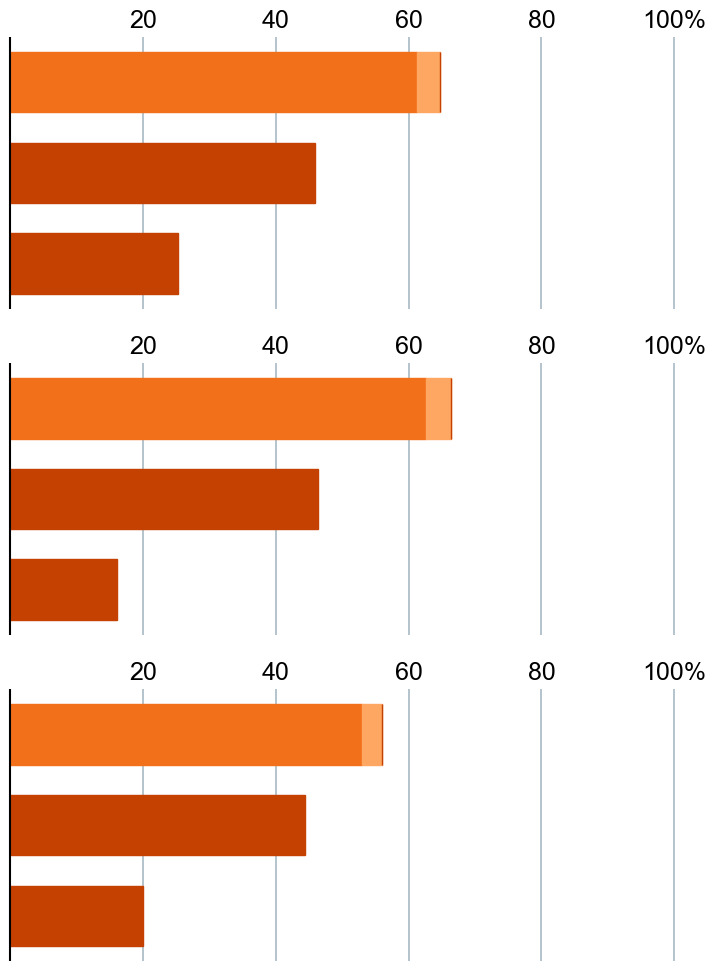

In [31]:
fig, ax = plt.subplots(nrows = 3, ncols = 1,figsize=(9, 12), sharex=True)
for t in [0,1,2]:
    name = name_list[t]
    x,y,z = df.iloc[3*t,3:9],df.iloc[3*t+1,3:9], df.iloc[3*t+2,3:9]
    x = x/x[0]
    y = y/y[0]
    z = z/z[0]
    bars = ax[t].barh([0.9,0.6, 0.3], [1,1,1], height = 0.2, color = 'white',alpha=0,edgecolor = 'black')
    for bar in bars:
        bar.set_linestyle('--')
        bar.set_linewidth(1)
    ax[t].barh([0.9,0.6, 0.3], [x[2],y[2],z[2]], height = 0.2, color = plt.cm.Oranges(0.6) , edgecolor = plt.cm.Oranges(0.6))
    ax[t].barh([0.9,0.6, 0.3], [x[3],y[3],z[3]], left = [x[2],y[2],z[2]], height = 0.2, color = plt.cm.Oranges(0.4), edgecolor = plt.cm.Oranges(0.4))
    ax[t].barh([0.9,0.6, 0.3], [x[4],y[4],z[4]], left = [x[2]+x[3],y[2]+y[3],z[2]+z[3]], height = 0.2, color = plt.cm.Oranges(0.8), edgecolor = plt.cm.Oranges(0.8))
    ax[t].xaxis.set_ticks([.2,.4,.6,.8,1])
    ax[t].xaxis.set_ticklabels(['20','40','60','80','100%'], size=18, fontfamily="Arial", fontweight=100)
    ax[t].xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
    ax[t].set_ylim((.15, 1.05))
    ax[t].set_axisbelow(True)
    ax[t].grid(axis = "x", color="#A8BAC4", lw=1.2)
    ax[t].spines["right"].set_visible(False)
    ax[t].spines["top"].set_visible(False)
    ax[t].spines["bottom"].set_visible(False)
    ax[t].spines["left"].set_lw(1.5)
    ax[t].spines["left"].set_capstyle("butt")
    ax[t].yaxis.set_visible(False)

plt.savefig(f'/Users/gorkordkx/Documents/Output/h2m/bar_region_snv_only_fs_2.svg', bbox_inches='tight')
plt.show()

- Mutation Type  

In [185]:
fs = 2
list_of_n = []
list_of_fs = []
list_of_input = []
list_of_output = []
list_of_class_0 = []
list_of_class_1 = []
list_of_class_2 = []
list_of_class_3 = []
list_of_region = []
for x in [0,1,2]:
    name = name_list[x]
    df = pd.read_csv(f'/Users/gorkordkx/Documents/Output/h2m/1_murine_mutation_database_output/{name}_output/{name}_result_f{fs}.csv')
    for i,type_list in enumerate([['SNP','DNP','ONP'],['INS'],['DEL']]):
        list_of_region.append(['Substitution','Insertion','Deletion'][i])
        list_of_n.append(name)
        list_of_fs.append(fs)
        df_sub = df[[x in type_list for x in df['type_h']]].reset_index(drop=True)
        l_1 = len(df_sub['index'].unique())
        df_sub_2 = df_sub[df_sub['status']==True]
        l_2 = len(df_sub_2['index'].unique())
        print(f'{name} in {list_of_region[i]}: {l_2} out of {l_1} ({l_2/l_1* 100:.2f}%) mutations can be modeled.\n')
        list_of_output.append(l_2)
        list_of_input.append(l_1)
        list_of_class_0.append(len(df_sub[df_sub['class']==0]['index'].unique()))
        list_of_class_1.append(len(df_sub[df_sub['class']==1]['index'].unique()))
        list_of_class_2.append(len(df_sub[df_sub['class']==2]['index'].unique()))
        list_of_class_3.append(len(df_sub[df_sub['class']==3]['index'].unique()))

aacr in Substitution: 442045 out of 707743 (62.46%) mutations can be modeled.

aacr in Insertion: 17136 out of 26913 (63.67%) mutations can be modeled.

aacr in Deletion: 36785 out of 65012 (56.58%) mutations can be modeled.

cosmic in Substitution: 296218 out of 597236 (49.60%) mutations can be modeled.

cosmic in Insertion: 281 out of 428 (65.65%) mutations can be modeled.

cosmic in Deletion: 699 out of 1149 (60.84%) mutations can be modeled.

clinvar in Substitution: 936484 out of 1871290 (50.04%) mutations can be modeled.

clinvar in Insertion: 20129 out of 45091 (44.64%) mutations can be modeled.

clinvar in Deletion: 43584 out of 104706 (41.63%) mutations can be modeled.



In [186]:
df = pd.DataFrame(zip(list_of_n, list_of_fs,list_of_region,
list_of_input,
list_of_output,
list_of_class_0,
list_of_class_1,
list_of_class_2,
list_of_class_3))
df.columns = ['Database','Flank_Size','Mutation_Type','Num_Input','Num_Output','Class_0','Class_1','Class_2','Class_3']
df

,Database,Flank_Size,Mutation_Type,Num_Input,Num_Output,Class_0,Class_1,Class_2,Class_3
0,aacr,2,Substitution,707743,442045,403312,23309,15424,295
1,aacr,2,Insertion,26913,17136,2589,53,14494,0
2,aacr,2,Deletion,65012,36785,6888,67,29830,145
3,cosmic,2,Substitution,597236,296218,242494,14158,39566,458
4,cosmic,2,Insertion,428,281,92,4,185,0
5,cosmic,2,Deletion,1149,699,290,5,404,1
6,clinvar,2,Substitution,1871290,936484,827374,47607,61503,1972
7,clinvar,2,Insertion,45091,20129,2665,33,17431,0
8,clinvar,2,Deletion,104706,43584,7418,30,36136,222


In [187]:
df['percet_modelable'] = df['Num_Output']/df['Num_Input']
df.to_csv('/Users/gorkordkx/Documents/Output/h2m/sta_4.csv', index = False)
df

,Database,Flank_Size,Mutation_Type,Num_Input,Num_Output,Class_0,Class_1,Class_2,Class_3,percet_modelable
0,aacr,2,Substitution,707743,442045,403312,23309,15424,295,0.624584
1,aacr,2,Insertion,26913,17136,2589,53,14494,0,0.636718
2,aacr,2,Deletion,65012,36785,6888,67,29830,145,0.565819
3,cosmic,2,Substitution,597236,296218,242494,14158,39566,458,0.495981
4,cosmic,2,Insertion,428,281,92,4,185,0,0.656542
5,cosmic,2,Deletion,1149,699,290,5,404,1,0.608355
6,clinvar,2,Substitution,1871290,936484,827374,47607,61503,1972,0.500448
7,clinvar,2,Insertion,45091,20129,2665,33,17431,0,0.446408
8,clinvar,2,Deletion,104706,43584,7418,30,36136,222,0.416251


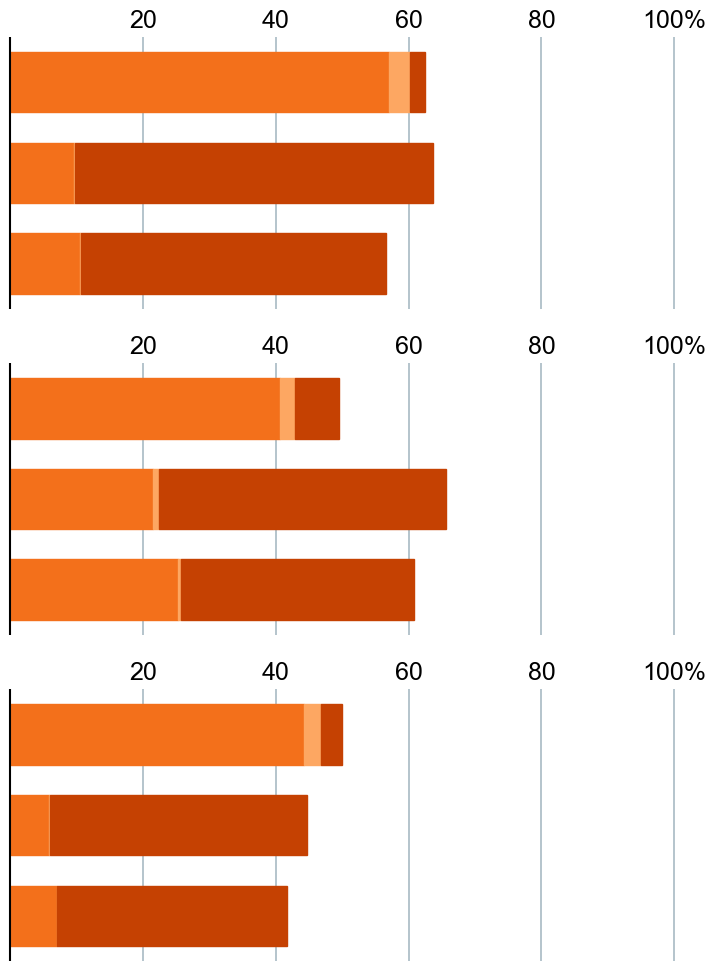

In [193]:
fig, ax = plt.subplots(nrows = 3, ncols = 1,figsize=(9, 12), sharex=True)
for t in [0,1,2]:
    name = name_list[t]
    x,y,z = df.iloc[3*t,3:9],df.iloc[3*t+1,3:9], df.iloc[3*t+2,3:9]
    x = x/x[0]
    y = y/y[0]
    z = z/z[0]
    bars = ax[t].barh([0.9,0.6, 0.3], [1,1,1], height = 0.2, color = 'white',alpha=0,edgecolor = 'black')
    for bar in bars:
        bar.set_linestyle('--')
        bar.set_linewidth(1)
    ax[t].barh([0.9,0.6, 0.3], [x[2],y[2],z[2]], height = 0.2, color = plt.cm.Oranges(0.6) , edgecolor = plt.cm.Oranges(0.6))
    ax[t].barh([0.9,0.6, 0.3], [x[3],y[3],z[3]], left = [x[2],y[2],z[2]], height = 0.2, color = plt.cm.Oranges(0.4), edgecolor = plt.cm.Oranges(0.4))
    ax[t].barh([0.9,0.6, 0.3], [x[4],y[4],z[4]], left = [x[2]+x[3],y[2]+y[3],z[2]+z[3]], height = 0.2, color = plt.cm.Oranges(0.8), edgecolor = plt.cm.Oranges(0.8))
    ax[t].xaxis.set_ticks([.2,.4,.6,.8,1])
    ax[t].xaxis.set_ticklabels(['20','40','60','80','100%'], size=18, fontfamily="Arial", fontweight=100)
    ax[t].xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
    ax[t].set_ylim((.15, 1.05))
    ax[t].set_axisbelow(True)
    ax[t].grid(axis = "x", color="#A8BAC4", lw=1.2)
    ax[t].spines["right"].set_visible(False)
    ax[t].spines["top"].set_visible(False)
    ax[t].spines["bottom"].set_visible(False)
    ax[t].spines["left"].set_lw(1.5)
    ax[t].spines["left"].set_capstyle("butt")
    ax[t].yaxis.set_visible(False)

plt.savefig(f'/Users/gorkordkx/Documents/Output/h2m/bar_type_fs_2.svg', bbox_inches='tight')
plt.show()

### (3) Coverage of p53 mutations  

In [11]:
name = 'aacr'
fs = 2
df = pd.read_csv(f'/Users/gorkordkx/Documents/Output/h2m/1_murine_mutation_database_output/{name}_output/{name}_result_f{fs}.csv')
df = df[df['gene_name_h']=='TP53']

# 使用正则表达式搜索数字
def search_loc(s):
    match = re.search(r':c\.(\d+)', s)
    if match:
        number = match.group(1)
        return int(number)
    else:
        return None
    
df['loc_h'] = [search_loc(s) for s in  df['HGVSc_h']]

In [20]:

color_dict = dict({
    'gene':plt.cm.Purples(0.7), 
    'flank':plt.cm.Greens(0.7), 
    'nce4nce':plt.cm.Oranges(0.8), 
    'nce4pce': plt.cm.Oranges(0.6), 
    'pce4pce':plt.cm.Oranges(0.4),
    'coding':'#018175', #codig
    'noncoding':'#FEE3B2', #non-coding
    'SNP':"#D862BC", 
    'ONP':"#675a85",
    'INS':plt.cm.Greens(0.5),
    'DEL':plt.cm.Purples(0.7)
})

In [4]:
df_unique = df.drop_duplicates(subset = 'index').reset_index(drop=True)

df_merge = pd.DataFrame({'loc':list(range(min(df_unique['loc_h']), max(df_unique['loc_h'])+1))})

df_draw_list = []
for x in [
    ['SNP','DNP','ONP'],
    ['INS'],
    ['DEL']
]:
    df_temp = df_unique[df_unique['type_h'].isin(x)].reset_index(drop=True)
    df_draw = pd.DataFrame(df_temp['loc_h'].value_counts()).reset_index(drop=False)
    df_draw = df_draw.rename(columns={'index':'loc',
                                      'loc_h':'count'})
    df_draw['s'] = 'h'
    df_draw = pd.merge(df_draw, df_merge, how = 'right', on = 'loc')
    df_draw['count'].fillna(0,inplace=True)
    df_draw['s'].fillna('h',inplace=True)
    df_draw = df_draw.sort_values(by = 'loc').reset_index(drop=True)
    df_draw_list.append(df_draw)

In [5]:
df_unique_mouse = df_unique[df_unique['status']==True].reset_index(drop=True)
df_unique_mouse['loc_m'] = [search_loc(s) for s in  df_unique_mouse['HGVSc_m']]
df_merge = pd.DataFrame({'loc':list(range(min(df_unique['loc_h']), max(df_unique['loc_h'])+1))})

df_draw_list_mouse = []
for x in [
    ['SNP','DNP','ONP'],
    ['INS'],
    ['DEL']
]:
    df_temp = df_unique_mouse[df_unique_mouse['type_m'].isin(x)].reset_index(drop=True)
    df_draw = pd.DataFrame(df_temp['loc_m'].value_counts()).reset_index(drop=False)
    df_draw = df_draw.rename(columns={'index':'loc',
                                      'loc_m':'count'})
    df_draw['s'] = 'm'
    df_draw = pd.merge(df_draw, df_merge, how = 'right', on = 'loc')
    df_draw['count'].fillna(0,inplace=True)
    df_draw['s'].fillna('m',inplace=True)
    df_draw = df_draw.sort_values(by = 'loc').reset_index(drop=True)
    df_draw_list_mouse.append(df_draw)

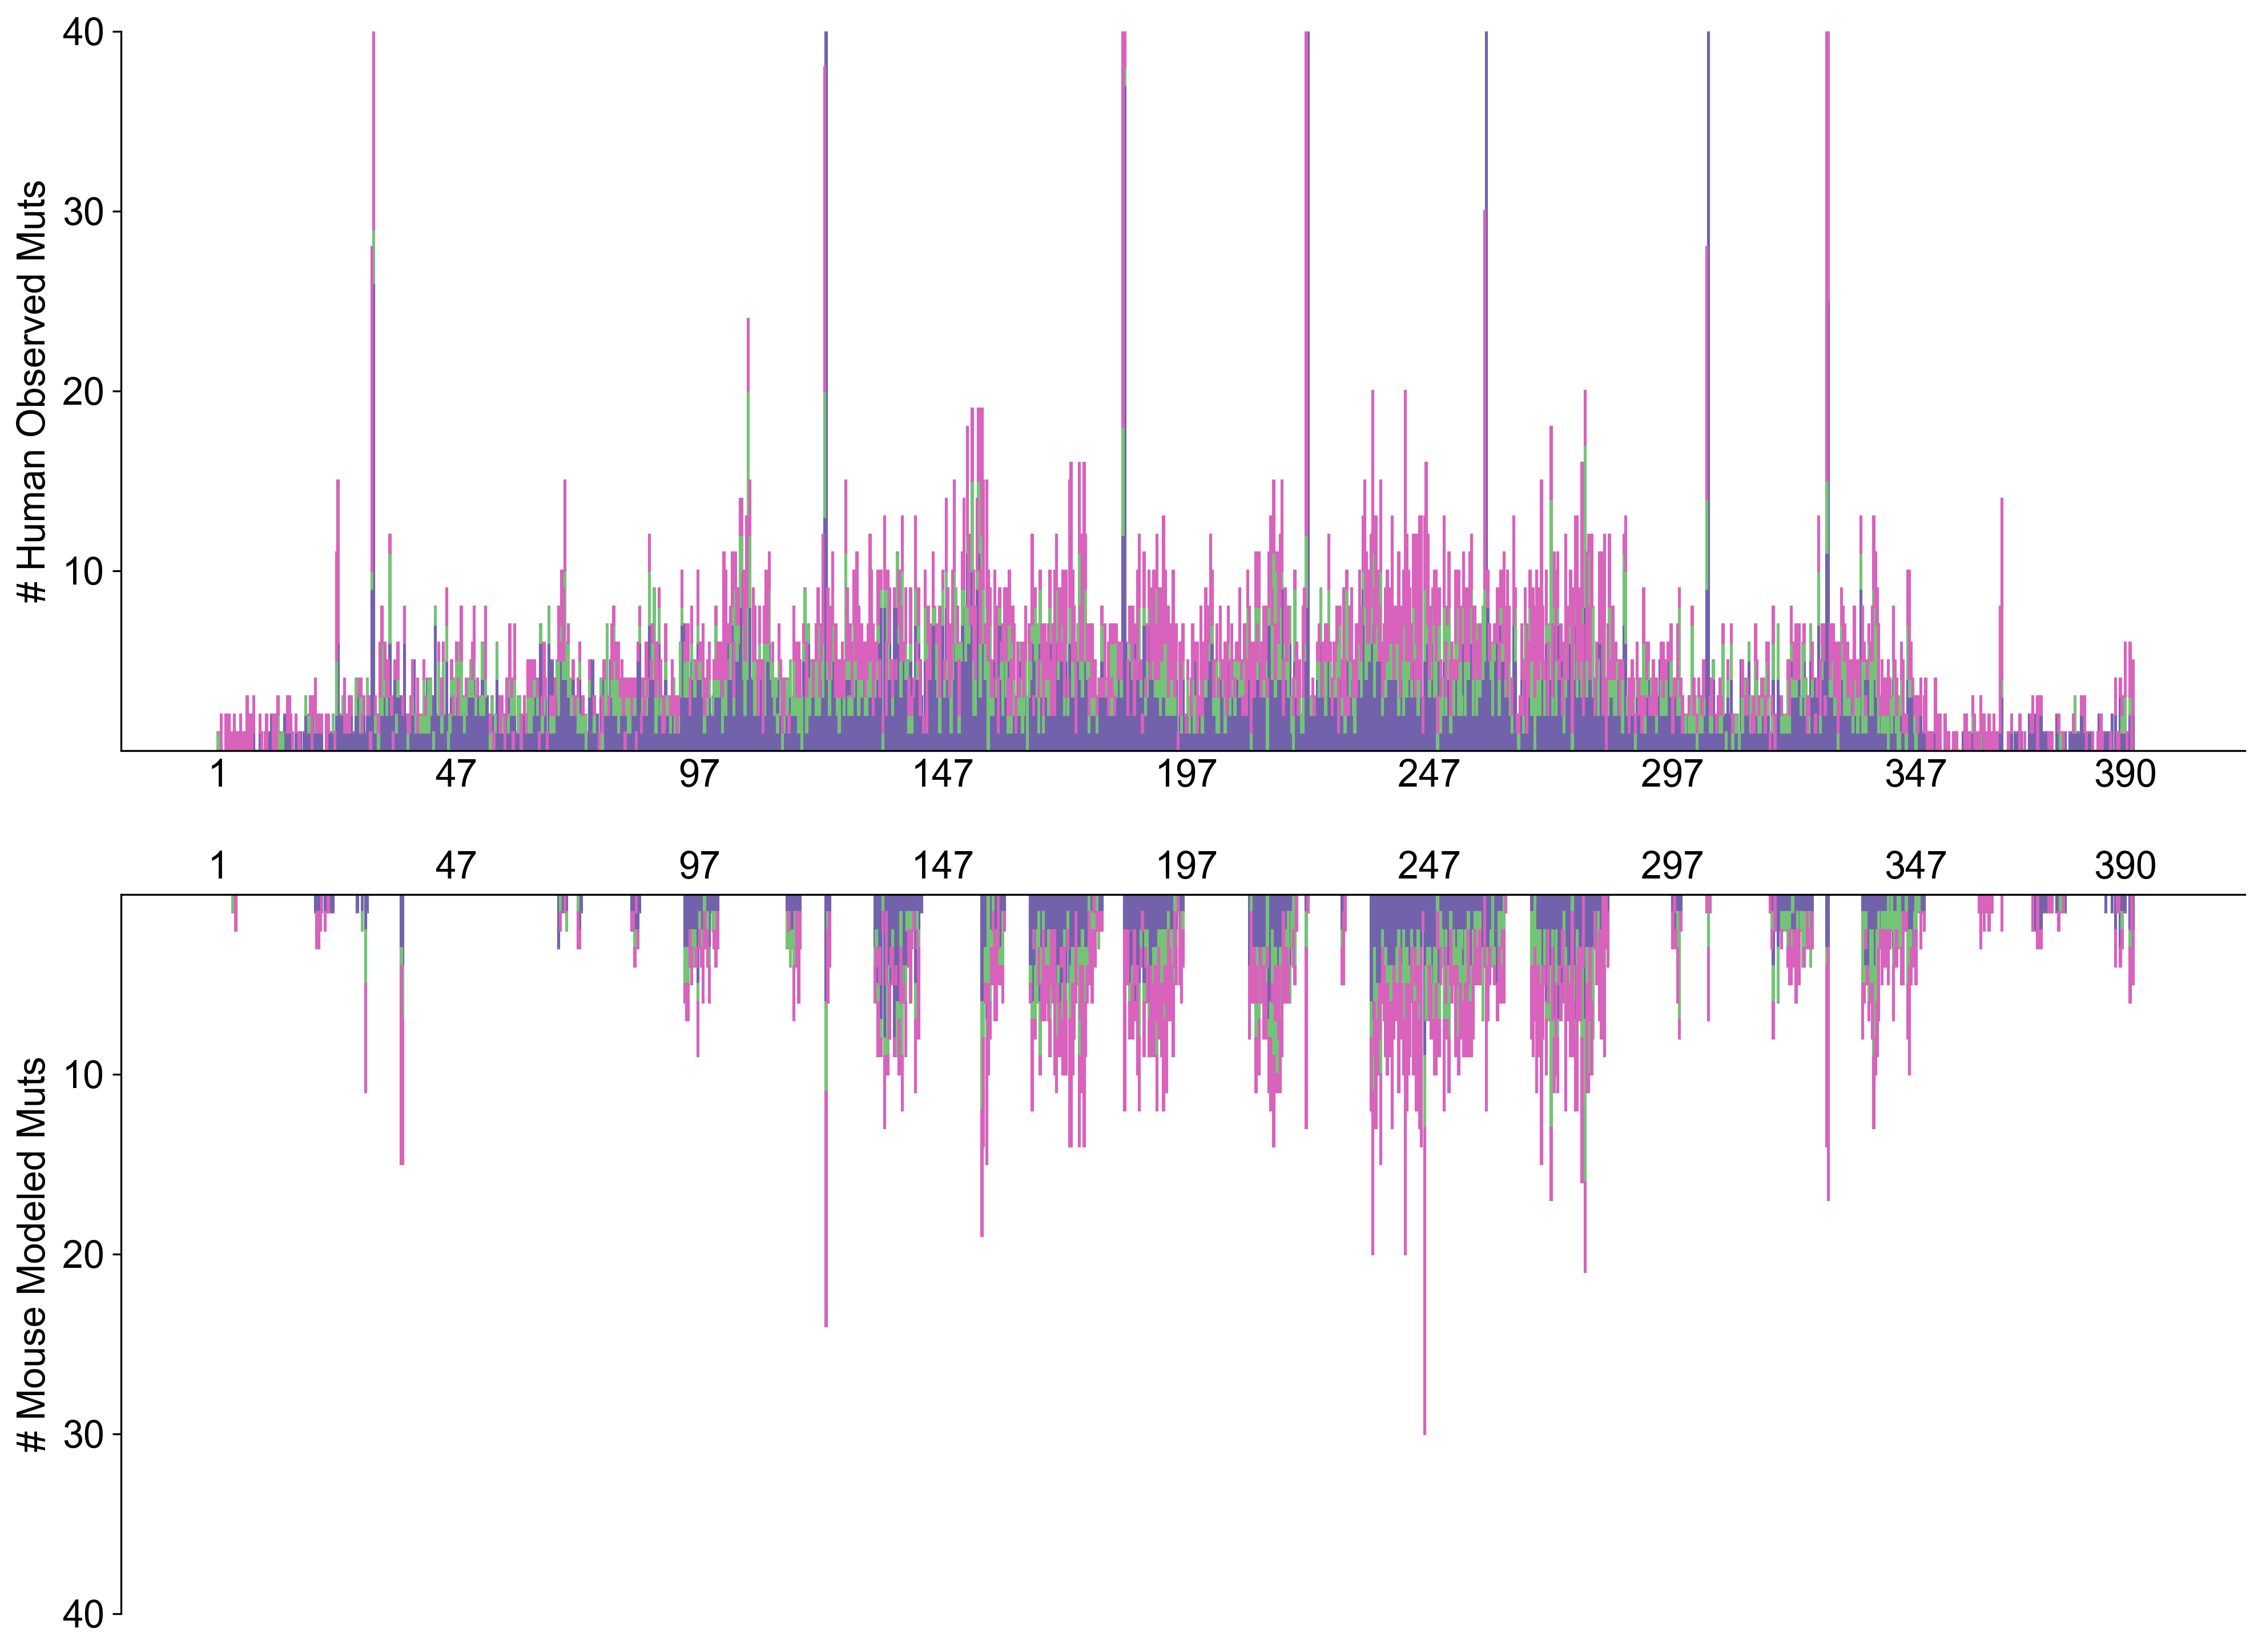

In [22]:
fig, ax = plt.subplots(2,1,figsize=(16,12), height_ratios=[1,1], sharex=True, dpi = 300)
ax[0].bar(df_draw_list[0]['loc'],df_draw_list[2]['count'], color=color_dict['DEL'], edgecolor=color_dict['DEL'], width = .5)
ax[0].bar(df_draw_list[1]['loc'],df_draw_list[1]['count'], color=color_dict['INS'], edgecolor=color_dict['INS'], bottom = df_draw_list[2]['count'], width = .5)
ax[0].bar(df_draw_list[2]['loc'],df_draw_list[0]['count'], color=color_dict['SNP'], edgecolor=color_dict['SNP'], bottom = [x+y for x,y in zip(df_draw_list[2]['count'], df_draw_list[1]['count'])], width = .5)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
# ax[0].tick_params(axis='both', which='major', labelsize=13)

ax[0].set_ylabel('# Human Observed Muts', fontsize=16)
ax[0].set_yticks([10,20,30,40])
ax[0].set_yticklabels([10,20,30,40], fontsize=16)
ax[0].set_ylim(0,40)
ax[0].set_xticks([x*3+1 for x in [0,49,99,149,199,249,299,349,392]])
ax[0].xaxis.set_tick_params(labelbottom=True, labeltop=False, length=0)
ax[0].set_xticklabels([1,50,100,150,200,250,300,350, 393], rotation=0, fontsize=16)

ax[1].bar(df_draw_list_mouse[0]['loc']+9,-df_draw_list_mouse[2]['count'], color=color_dict['DEL'], edgecolor=color_dict['DEL'], width = .5)
ax[1].bar(df_draw_list_mouse[1]['loc']+9,-df_draw_list_mouse[1]['count'], color=color_dict['INS'], edgecolor=color_dict['INS'], bottom = -df_draw_list_mouse[2]['count'], width = .5)
ax[1].bar(df_draw_list_mouse[2]['loc']+9,-df_draw_list_mouse[0]['count'], color=color_dict['SNP'], edgecolor=color_dict['SNP'], bottom = [-(x+y) for x,y in zip(df_draw_list_mouse[1]['count'], df_draw_list_mouse[2]['count'])], width = .5)
ax[1].tick_params(axis='both', which='major', labelsize=16)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)

ax[1].set_ylabel('# Mouse Modeled Muts', fontsize=16)
ax[1].set_yticks([-10,-20,-30,-40])
ax[1].set_yticklabels([10,20,30,40], fontsize=16)
ax[1].set_ylim(-40,0)
ax[1].xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
ax[1].set_xticks([x*3+1 for x in [0,49,99,149,199,249,299,349,392]])
ax[1].set_xticklabels([1,47,97,147,197,247,297,347, 390], rotation=0, fontsize=16)

plt.savefig('/Users/gorkordkx/Documents/Output/h2m/tp53_v3.svg', bbox_inches='tight')
plt.show()

In [231]:
df_draw_list[0] = df_draw_list[0].rename(columns = {'count':'count_substitution'})
df_draw_list[1] = df_draw_list[1].rename(columns = {'count':'count_insertion'})
df_draw_list[2] = df_draw_list[2].rename(columns = {'count':'count_deletion'})
df = pd.merge(df_draw_list[0], df_draw_list[1], on = ['loc','s'], how = 'outer')
df = pd.merge(df, df_draw_list[2], on = ['loc','s'], how = 'outer')
df

In [246]:
df_draw_list_mouse[0] = df_draw_list_mouse[0].rename(columns = {'count':'count_substitution'})
df_draw_list_mouse[1] = df_draw_list_mouse[1].rename(columns = {'count':'count_insertion'})
df_draw_list_mouse[2] = df_draw_list_mouse[2].rename(columns = {'count':'count_deletion'})
df_2 = pd.merge(df_draw_list_mouse[0], df_draw_list_mouse[1], on = ['loc','s'], how = 'outer')
df_2 = pd.merge(df_2, df_draw_list_mouse[2], on = ['loc','s'], how = 'outer')
df_2

,loc,count_substitution,s,count_insertion,count_deletion
0,1,0.0,m,1.0,0.0
1,2,0.0,m,0.0,0.0
2,3,2.0,m,0.0,0.0
3,4,0.0,m,0.0,0.0
4,5,0.0,m,0.0,0.0
...,...,...,...,...,...
1177,1178,0.0,m,0.0,0.0
1178,1179,0.0,m,0.0,0.0
1179,1180,0.0,m,0.0,0.0
1180,1181,0.0,m,0.0,0.0


In [247]:
pd.concat([df,df_2]).to_csv('/Users/gorkordkx/Documents/Output/h2m/sta_5.csv', index = False)